# Churn Project Preliminary Modeling

### Logistic Regression - Baseline

In [35]:
import os
import sys
import time

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('/home/ubuntu/src')
from MLModelingTools import model_test, model_testN

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

from yellowbrick.classifier import ClassificationReport
from sklearn.metrics import confusion_matrix

Read the training data file.  This file was created by running the notebooks:
* Telecom to SQL
* Telecom clean and eda

In [18]:
# Read the csv file save by the clean/eda notebook
train_df = pd.read_csv('../data/churn_train_clean.csv')


# Sometimes the index column is read as an unnamed column, if so drop it
if 'Unnamed: 0' in train_df.columns :
    train_df = train_df.drop('Unnamed: 0', axis=1)
    
train_df.columns

Index(['customerID', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'Month-to-month', 'One year', 'Fiber optic', 'No', 'Female'],
      dtype='object')

In [22]:
# Define which columns we're going to use in our modeling.
train_columns = ['SeniorCitizen', 'Partner', 'Dependents', \
       'tenure', 'PhoneService', 'MultipleLines',  \
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', \
       'StreamingTV', 'StreamingMovies', 'MonthlyCharges', 'TotalCharges', \
       'Month-to-month', 'One year', 'Fiber optic', 'No', 'Female']
X = train_df[train_columns]
y= train_df['Churn']

In [30]:
# Create a logistic regression model that we can use as a baseline
model_1 = LogisticRegression(solver = 'liblinear', C=0.2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [38]:
model_1.fit(X_train,y_train)
logistic_confusion = confusion_matrix(y_test, model_1.predict(X_test))

<Figure size 2400x1650 with 0 Axes>

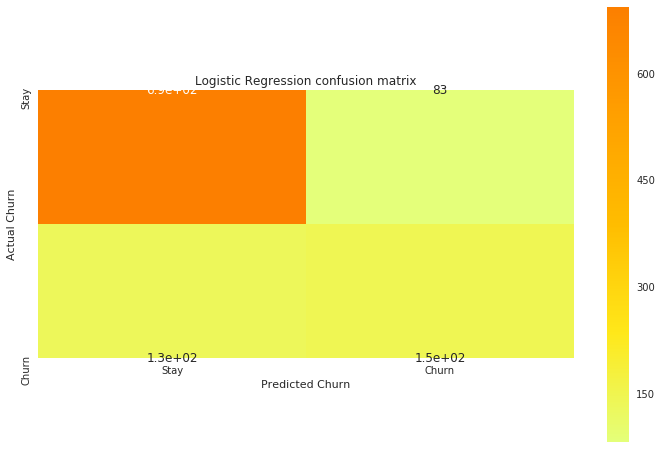

In [46]:
plt.figure(dpi=300)
plt.figure(figsize = (12,8))
sns.heatmap(logistic_confusion, cmap=plt.cm.Wistia, annot=True, square=True,
           xticklabels=['Stay', 'Churn'],
           yticklabels=['Stay', 'Churn'])

plt.xlabel('Predicted Churn')
plt.ylabel('Actual Churn')
plt.title('Logistic Regression confusion matrix');

In [28]:
'''
visualizer = ClassificationReport(model_1)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()
'''

'\nvisualizer = ClassificationReport(model_1)\n\nvisualizer.fit(X_train, y_train)\nvisualizer.score(X_test, y_test)\nvisualizer.show()\n'

In [29]:
'''
from yellowbrick.features import parallel_coordinates
from yellowbrick.classifier import classification_report
from yellowbrick.features import Rank2D

visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(X)
visualizer.show()

# Displays parallel coordinates
#g = parallel_coordinates(X, y)

# Displays classification report
#g = classification_report(LogisticRegression(), X, y)
'''

'\nfrom yellowbrick.features import parallel_coordinates\nfrom yellowbrick.classifier import classification_report\nfrom yellowbrick.features import Rank2D\n\nvisualizer = Rank2D(algorithm="pearson")\nvisualizer.fit_transform(X)\nvisualizer.show()\n\n# Displays parallel coordinates\n#g = parallel_coordinates(X, y)\n\n# Displays classification report\n#g = classification_report(LogisticRegression(), X, y)\n'